In [60]:
import pandas as pd 
data = pd.read_csv("athlete_events.csv") 
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [2]:
data.describe()

,Age,Height,Weight,Year
count,261642.000000,210945.000000,208241.000000,271116.000000
mean,25.556898,175.338970,70.702393,1978.378480
std,6.393561,10.518462,14.348020,29.877632
min,10.000000,127.000000,25.000000,1896.000000
25%,21.000000,168.000000,60.000000,1960.000000
50%,24.000000,175.000000,70.000000,1988.000000
75%,28.000000,183.000000,79.000000,2002.000000
max,97.000000,226.000000,214.000000,2016.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 1 to 135571
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     261642 non-null  float64
 3   Height  210945 non-null  float64
 4   Weight  208241 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Games   271116 non-null  object 
 8   Year    271116 non-null  int64  
 9   Season  271116 non-null  object 
 10  City    271116 non-null  object 
 11  Sport   271116 non-null  object 
 12  Event   271116 non-null  object 
 13  Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 31.0+ MB


In [4]:
data.isnull().any()

Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
dtype: bool

In [5]:
#Count/Find how many records without any medal mentioned.  
data['Medal'].isna().sum()


231333

In [6]:
gold = data.loc[data['Medal']=='Gold']
gold.loc[gold['Age']==gold['Age'].max()]

#data['Age'].max()
#data['Medal']=='Gold'

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
53238,Charles Jacobus,M,64.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Roque,Roque Men's Singles,Gold
117046,Oscar Gomer Swahn,M,64.0,NaN,NaN,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Shooting,"Shooting Men's Running Target, Single Shot, Team",Gold


In [7]:
womanGold = gold.loc[gold['Sex']=='F']
womanGold.groupby(['NOC','Year'])['Medal'].count()

NOC  Year
ALG  1992     1
     2000     1
ANZ  1912     1
ARG  2016     2
AUS  1932     1
             ..
YUG  1984    15
     1988     1
ZIM  1980    15
     2004     1
     2008     1
Name: Medal, Length: 507, dtype: int64

In [8]:
#loc
medal = data.loc[data['Medal'].notnull()]
medal

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze


In [9]:
ina = data.loc[data['NOC']=='INA']
ina.loc[ina['Medal'].notnull()]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
1301,Sri Wahyuni Agustiani,F,21.0,147.0,47.0,Indonesia,INA,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Flyweight,Silver
1374,Tontowi Ahmad,M,29.0,179.0,72.0,Indonesia-1,INA,2016 Summer,2016,Summer,Rio de Janeiro,Badminton,Badminton Mixed Doubles,Gold
5040,Antonius Budi Ariantho,M,24.0,170.0,66.0,Indonesia-1,INA,1996 Summer,1996,Summer,Atlanta,Badminton,Badminton Men's Doubles,Bronze
16152,Alexander Alan Budikusuma Wiratama,M,24.0,178.0,71.0,Indonesia,INA,1992 Summer,1992,Summer,Barcelona,Badminton,Badminton Men's Singles,Gold
32609,Hian Eng,M,27.0,175.0,68.0,Indonesia-1,INA,2004 Summer,2004,Summer,Athina,Badminton,Badminton Men's Doubles,Bronze
43863,Rudy Gunawan,M,25.0,185.0,83.0,Indonesia-1,INA,1992 Summer,1992,Summer,Barcelona,Badminton,Badminton Men's Doubles,Silver
43865,Tony Gunawan,M,25.0,173.0,80.0,Indonesia,INA,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Doubles,Gold
45532,Lilies Handayani,F,23.0,155.0,50.0,Indonesia,INA,1988 Summer,1988,Summer,Seoul,Archery,Archery Women's Team,Silver
46316,Eddy Hartono Arbie,M,28.0,173.0,73.0,Indonesia-1,INA,1992 Summer,1992,Summer,Barcelona,Badminton,Badminton Men's Doubles,Silver


In [10]:
ina.groupby(['Year','Medal'])['Medal'].count()

Year  Medal 
1988  Silver    3
1992  Bronze    1
      Gold      2
      Silver    3
1996  Bronze    3
      Gold      2
      Silver    1
2000  Bronze    2
      Gold      2
      Silver    4
2004  Bronze    3
      Gold      1
      Silver    1
2008  Bronze    3
      Gold      2
      Silver    2
2012  Bronze    1
      Silver    1
2016  Gold      2
      Silver    2
Name: Medal, dtype: int64

In [11]:
ina['Medal'].value_counts()

Silver    17
Bronze    13
Gold      11
Name: Medal, dtype: int64

In [123]:
pivot = pd.pivot_table(data[['Year','NOC','Medal','ID']], index=['Year', 'NOC'], columns='Medal', aggfunc='count')
pivot

ID                     
Medal    Bronze Gold No Medal Silver
Year NOC                            
1896 AUS    1.0  2.0      2.0    NaN
     AUT    2.0  2.0      3.0    1.0
     DEN    3.0  1.0      9.0    2.0
     FRA    2.0  5.0     15.0    4.0
     GBR    3.0  3.0     16.0    3.0
...         ...  ...      ...    ...
2016 VIE    NaN  1.0     26.0    1.0
     VIN    NaN  NaN      4.0    NaN
     YEM    NaN  NaN      3.0    NaN
     ZAM    NaN  NaN      7.0    NaN
     ZIM    NaN  NaN     31.0    NaN

[3305 rows x 4 columns]

In [13]:
data.groupby('Medal').count()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event
Medal,,,,,,,,,,,,,
Bronze,13295,13295,13006,10366,10227,13295,13295,13295,13295,13295,13295,13295,13295
Gold,13372,13372,13224,10539,10254,13372,13372,13372,13372,13372,13372,13372,13372
Silver,13116,13116,12821,10167,9975,13116,13116,13116,13116,13116,13116,13116,13116


In [14]:
data[['Year','NOC','Medal']]

,Year,NOC,Medal
ID,,,
1,1992,CHN,NaN
2,2012,CHN,NaN
3,1920,DEN,NaN
4,1900,DEN,Gold
5,1988,NED,NaN
...,...,...,...
135569,1976,POL,NaN
135570,2014,POL,NaN
135570,2014,POL,NaN


In [15]:
#data.groupby['Year','NOC','Medal'].count

In [23]:
dataMedal = data[data['Medal'].notnull()]
dataMedal

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze


In [24]:
import math  
dataMedal['Age'].fillna(value=math.floor(dataMedal['Age'].mean()),inplace=True)
#dataMedal.loc[dataMedal['Sex']=='M']['Height'].fillna(value=dataMedal.loc[dataMedal['Sex']=='M']['Height'].mean(), inplace=True)
#dataMedal['Weight'].fillna(value=dataMedal['Weight'].mean(), inplace=True)
dataMedal

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze


In [124]:
dataMedal.loc[dataMedal['Sex']=='M']['Height'].fillna(dataMedal.loc[dataMedal['Sex']=='M']['Height'].mean(),inplace=True)
dataMedal.loc[dataMedal['Sex']=='F']['Height'].fillna(dataMedal.loc[dataMedal['Sex']=='F']['Height'].mean(),inplace=True)
dataMedal
#dataMedal2 = dataMedal.loc[dataMedal['Sex']=='M']['Height'].fillna(dataMedal.loc[dataMedal['Sex']=='M']['Height'].mean())
#print(dataMedal2)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
4,Edgar Lindenau Aabye,M,34.0,NaN,94.137931,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
15,Arvo Ossian Aaltonen,M,30.0,NaN,73.251005,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
15,Arvo Ossian Aaltonen,M,30.0,NaN,73.251005,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.000000,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.000000,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.000000,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
135554,Bogusaw Zych,M,28.0,182.0,82.000000,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze


In [26]:
dataMedal["Weight"] = dataMedal.groupby("Sport")['Weight'].transform(lambda x: x.fillna(x.mean()))
dataMedal
                                                                     
                                                                     


C:\Users\User\AppData\Local\Temp/ipykernel_16768/3929447481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMedal["Weight"] = dataMedal.groupby("Sport")['Weight'].transform(lambda x: x.fillna(x.mean()))


,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
4,Edgar Lindenau Aabye,M,34.0,NaN,94.137931,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
15,Arvo Ossian Aaltonen,M,30.0,NaN,73.251005,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
15,Arvo Ossian Aaltonen,M,30.0,NaN,73.251005,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.000000,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.000000,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.000000,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
135554,Bogusaw Zych,M,28.0,182.0,82.000000,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze


Text(0.5, 1.0, 'Gold medals in gymnastic over age')

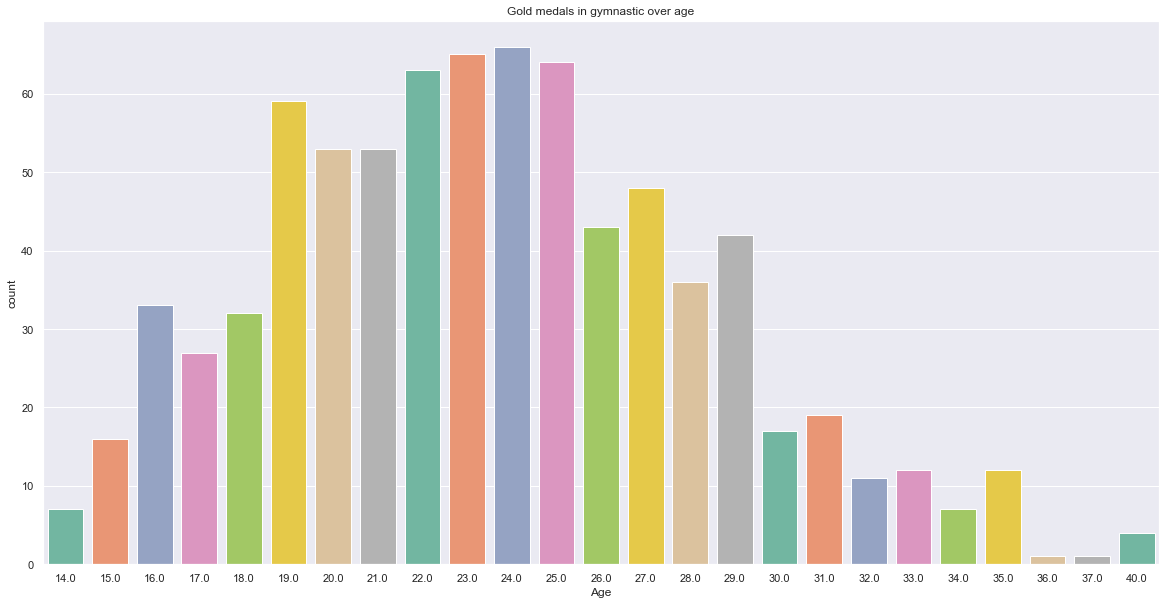

In [122]:
import seaborn as sb
from matplotlib import pyplot as plot

gymData=dataMedal[(dataMedal['Sport']=='Gymnastics') & (dataMedal['Medal']=='Gold')]


sb.set(style="darkgrid")
plot.figure(figsize=(20, 10))
sns.countplot(x='Age', data=gymData, palette='Set2')
plot.title('Gold medals in gymnastic over age')

Text(0.5, 1.0, 'Medals won by China over years')

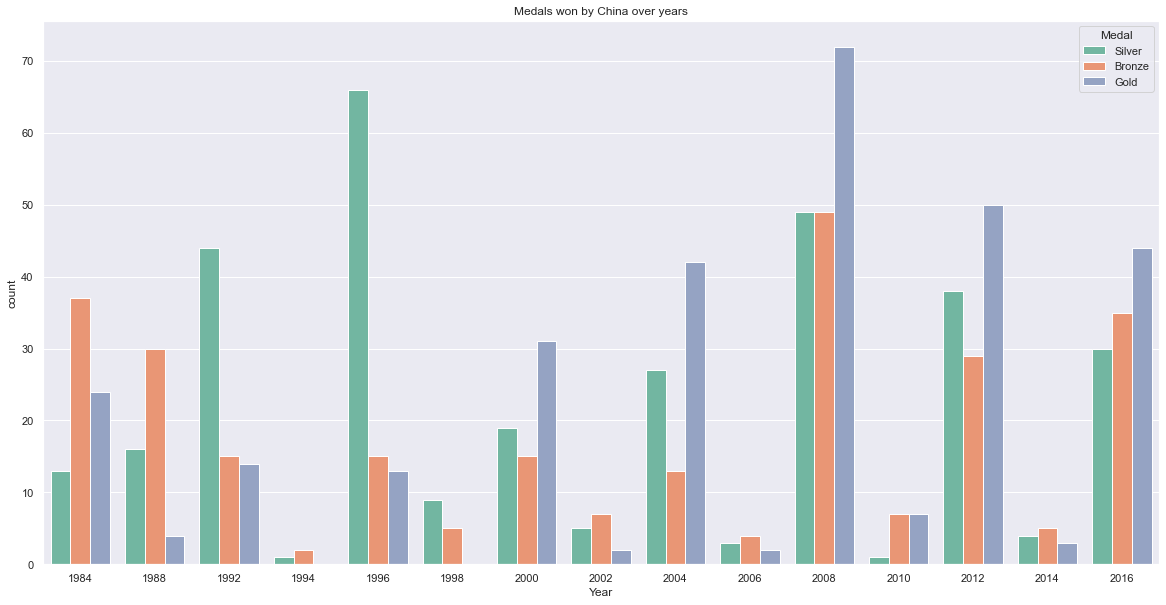

In [33]:
import seaborn as sns
from matplotlib import pyplot as plt

chinaMedal=dataMedal[(dataMedal['Team']=='China')]


sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', hue='Medal', data=chinaMedal, palette='Set2')
plt.title('Medals won by China over years')

Text(0.5, 1.0, 'Gold medals won by china in summer olympics in sports')

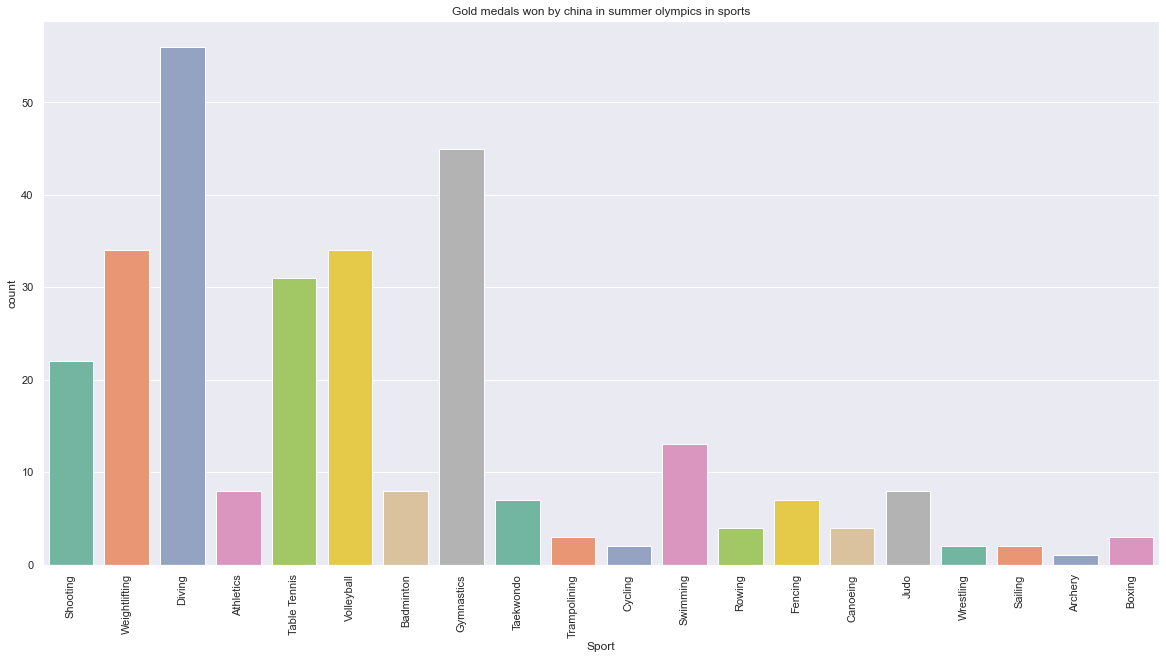

In [39]:
chinaSummerGold=dataMedal[(dataMedal['Season']=='Summer') & (dataMedal['Team']=='China') & (dataMedal['Medal']=='Gold')]
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
sns.countplot(x='Sport', data=chinaSummerGold, palette='Set2')
plt.title('Gold medals won by china in summer olympics in sports')


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Variation of Height for Male Athletes over time')

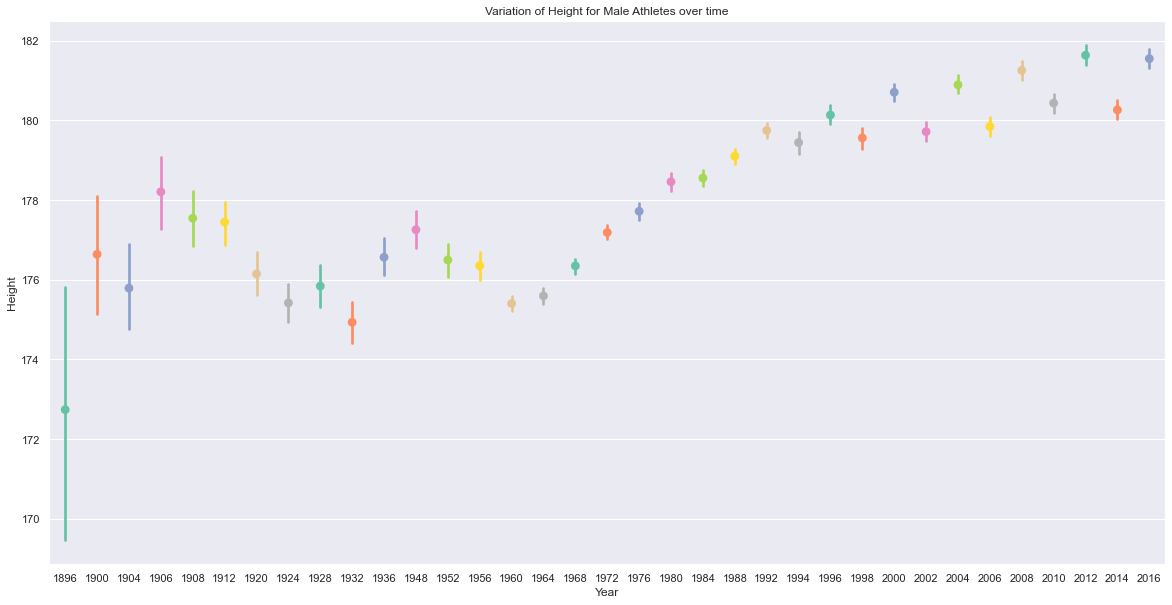

In [103]:
menData=data[data['Sex']=='M']

plt.figure(figsize=(20, 10))
sns.pointplot('Year', 'Height', data=menData, palette='Set2')
plt.title('Variation of Height for Male Athletes over time')

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Variation of Height for Female Athletes over time')

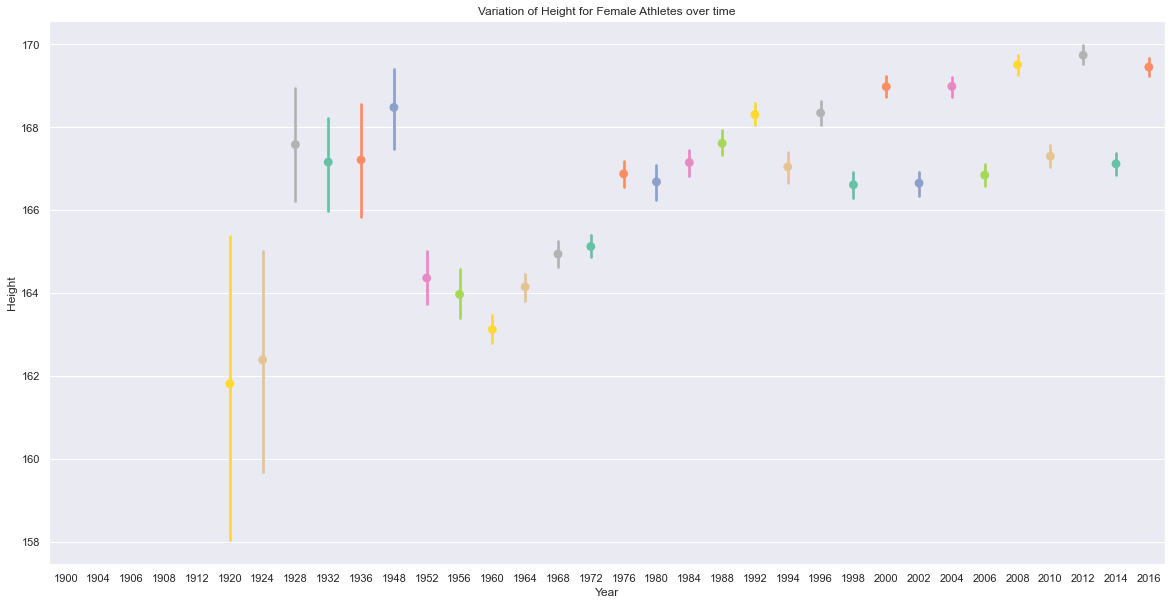

In [105]:
femaleData=data[data['Sex']=='F']

plt.figure(figsize=(20, 10))
sns.pointplot('Year', 'Height', data=femaleData, palette='Set2')
plt.title('Variation of Height for Female Athletes over time')

Text(0.5, 1.0, 'Top 5 countries with most medals')

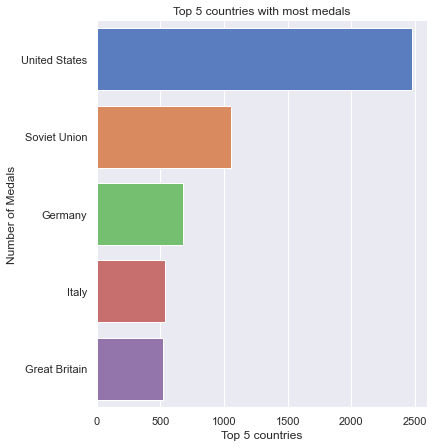

In [125]:
goldMedal = dataMedal[dataMedal['Medal']=='Gold']
top5goldMedal = goldMedal['Team'].value_counts().reset_index(name='Medal').head(5)

g = sns.catplot(x="Medal", y="index", data=top5goldMedal,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 5 countries")
g.set_ylabels("Number of Medals")
plt.title('Top 5 countries with most medals')

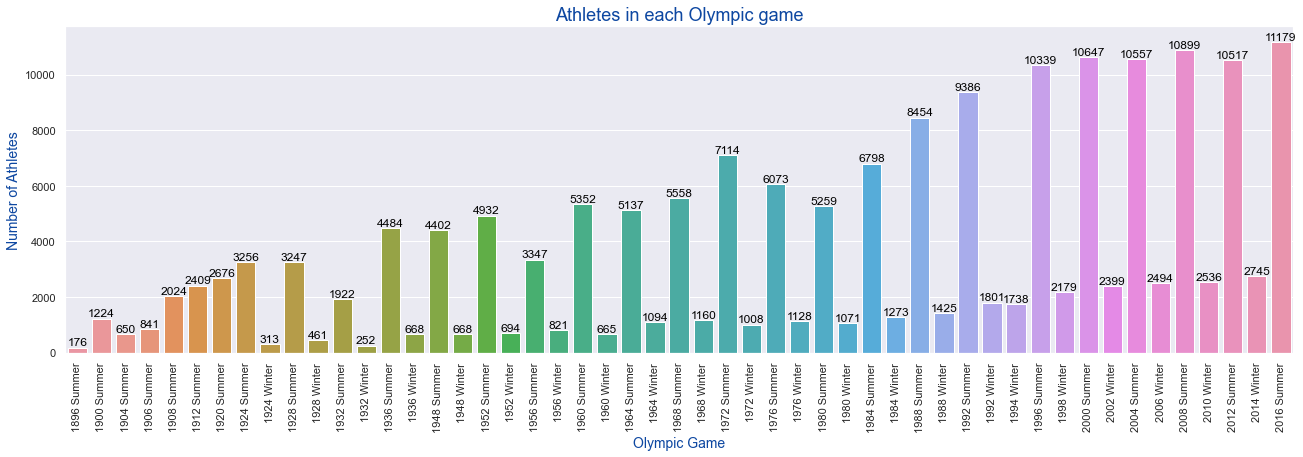

In [71]:
athletes = data.pivot_table(data, index=['Games'], aggfunc=lambda x: len(x.unique())).reset_index()[['Games','ID']]
fig, ax = plt.subplots(figsize=(22,6))
a = sns.barplot(x='Games', y='ID', data=athletes, ax=ax)
a.set_xticklabels(labels=athletes['Games'],rotation=90)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

ax.set_xlabel('Olympic Game', size=14, color="#0D47A1")
ax.set_ylabel('Number of Athletes', size=14, color="#0D47A1")
ax.set_title('Athletes in each Olympic game', size=18, color="#0D47A1")

plt.show()

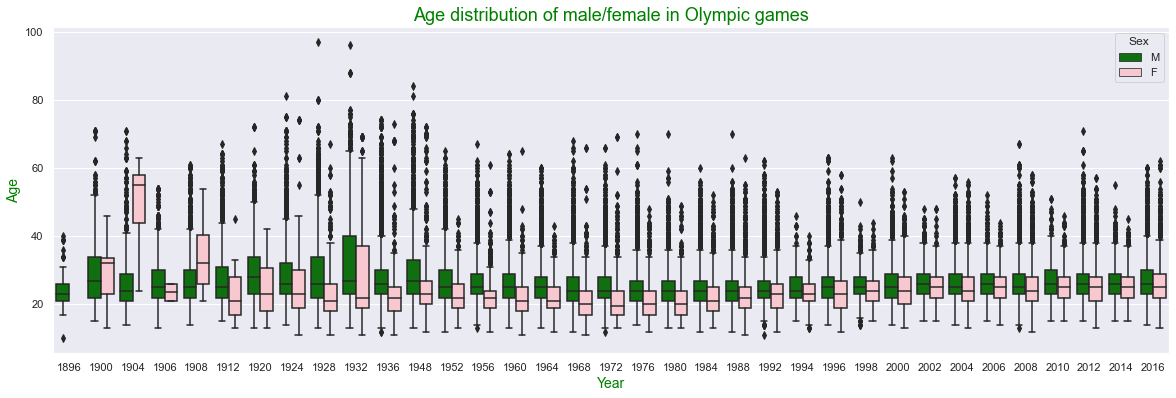

In [88]:
fig, ax = plt.subplots(figsize=(20,6))
a = sns.boxplot(x="Year", y="Age", hue="Sex", palette={"M": "green", "F":"pink"}, data=data, ax=ax)
ax.set_xlabel('Year', size=14, color="green")
ax.set_ylabel('Age', size=14, color="green")
ax.set_title('Age distribution of male/female in Olympic games', size=18, color="green")
plt.show()

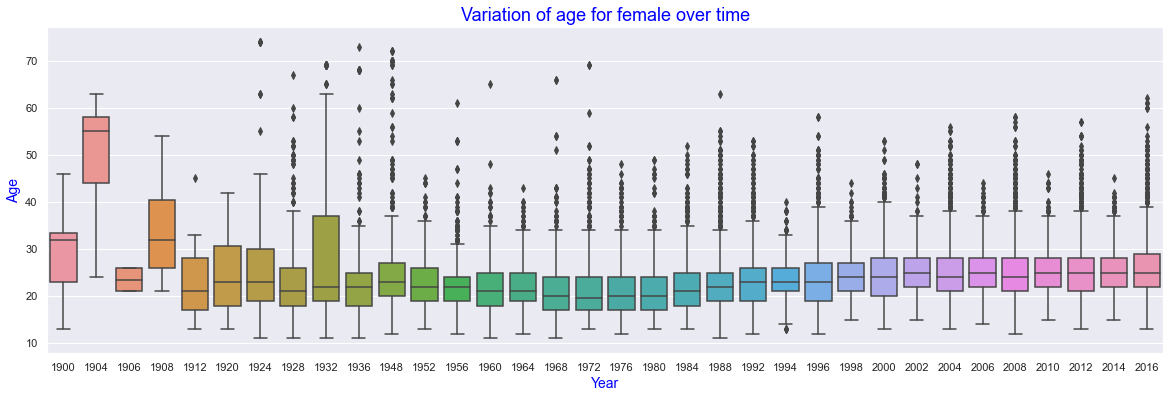

In [120]:
fig, ax = plt.subplots(figsize=(20,6))
a = sns.boxplot(x="Year",y="Age", data=data[data['Sex']=='F'], ax=ax)
        
ax.set_xlabel('Year', size=14, color="blue")
ax.set_ylabel('Age', size=14, color="blue")
ax.set_title('Variation of age for female over time', size=18, color="blue")
plt.show()

Text(0.5, 1.0, 'Height and weight ratio of athletes')

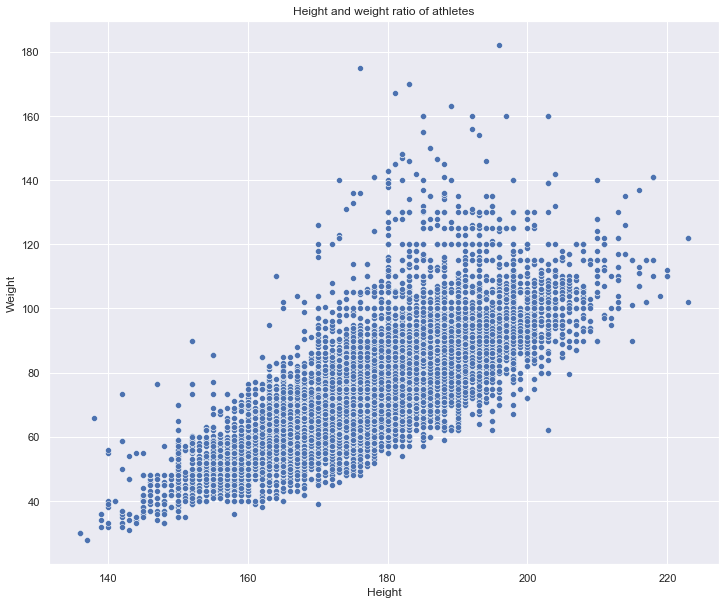

In [90]:
plt.figure(figsize=(12, 10))
ax = sns.scatterplot(x="Height", y="Weight", data=dataMedal)
plt.title('Height and weight ratio of athletes')

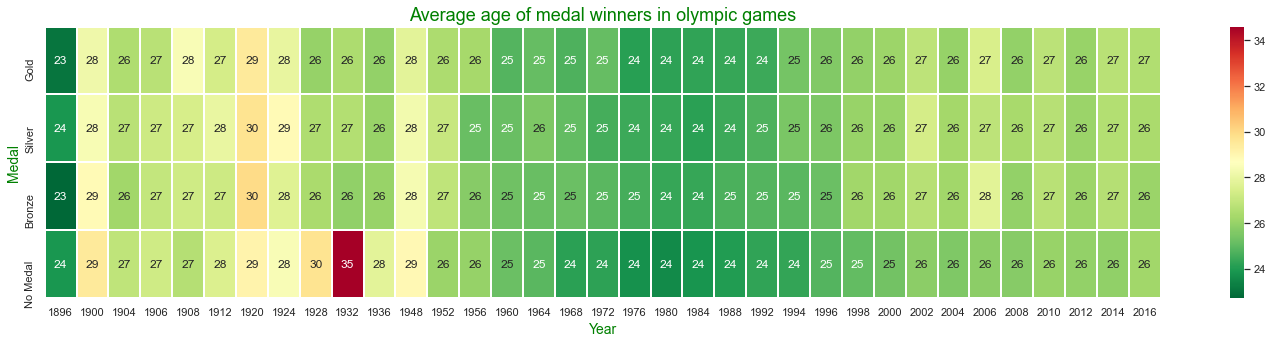

In [117]:
import numpy as np

data['Medal'].fillna(value="No Medal",inplace=True)

yearMedal = data.pivot_table(data, index=['Year','Medal'], aggfunc=np.mean).reset_index()[['Year','Medal','Age']]
yearMedal = yearMedal.pivot("Medal", "Year", "Age")
yearMedal = yearMedal.reindex(["Gold","Silver","Bronze","No Medal"])
f, ax = plt.subplots(figsize=(25, 5))
sns.heatmap(yearMedal, annot=True, linewidths=0.05, ax=ax, cmap="RdYlGn_r")

ax.set_xlabel('Year', size=14, color="green")
ax.set_ylabel('Medal', size=14, color="green")
ax.set_title('Average age of medal winners in olympic games', size=18, color="green")
plt.show()